## Import various libraries

In [1]:
%load_ext lab_black

In [3]:
import os

os.chdir("../")
os.getcwd()

'/libre/dumontj/dl'

In [2]:
import sys

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
import xarray as xr
from cmcrameri import cm
from hydra import compose, initialize
from omegaconf import OmegaConf, DictConfig
from scipy.optimize import differential_evolution
from sklearn import preprocessing

sys.path.append("../")
import matplotlib_functions as mympf
from Data import Data_eval
import model_eval
import models.reg as rm

mympf.setMatplotlibParam()
plt.viridis()

2023-11-09 18:16:00.932230: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-09 18:16:00.932268: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-09 18:16:00.932314: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-09 18:16:00.939899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<Figure size 1920x1440 with 0 Axes>

### Modify dir_res to where the weights of the CNN model are stored (specifying the full path)

In [11]:
dir_res = "/libre/dumontj/dl/examples/lip_with_no2"

## Dataset and model choice
* #### name_model = weights of the selected trained CNN 
* #### path_eval_nc = path to the netcdf file used for evaluating the results

In [12]:
name_model = dir_res
path_eval_nc = "/libre/dumontj/coco2/dl-input/lippendorf/train_dataset.nc"

#### Get dataset, weights

In [14]:
data = model_eval.get_data_for_inversion(
    dir_res,
    path_eval_nc,
)

model = model_eval.get_inversion_model(
    os.path.join(dir_res, name_model), name_w="w_last.h5"
)

2023-11-09 18:20:35.697812: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14662 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


#### Make emission predictions, then compute absolute (MAE) and relative (MAPE) metrics 

In [15]:
metrics = model_eval.get_inv_metrics_model_on_data(model, data)
print("mae:", np.mean(metrics["mae"]))
print("mape:", np.mean(metrics["mape"]))

2023-11-09 18:20:44.536733: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-09 18:20:45.567986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-09 18:20:46.149518: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


197/197 [==============================] - 3s 6ms/step
mae: 3.1977038
mape: 22.204851


nwbce: 5.293288230895996
idx: 6255
origin: smart_2km_Lip_64
time: 2015-12-23T15:00:00.000000000
emiss: [19.72118 20.06963 21.11642]

nwbce: 3.8539695739746094
idx: 5963
origin: smart_2km_Lip_64
time: 2015-12-03T11:00:00.000000000
emiss: [21.11642 21.29104 18.84897]

nwbce: 1.1063270568847656
idx: 4184
origin: smart_2km_Lip_64
time: 2015-08-27T08:00:00.000000000
emiss: [16.97559 13.12529 10.55657]

1/1 [==============================] - 0s 16ms/step


<Figure size 1920x1440 with 0 Axes>

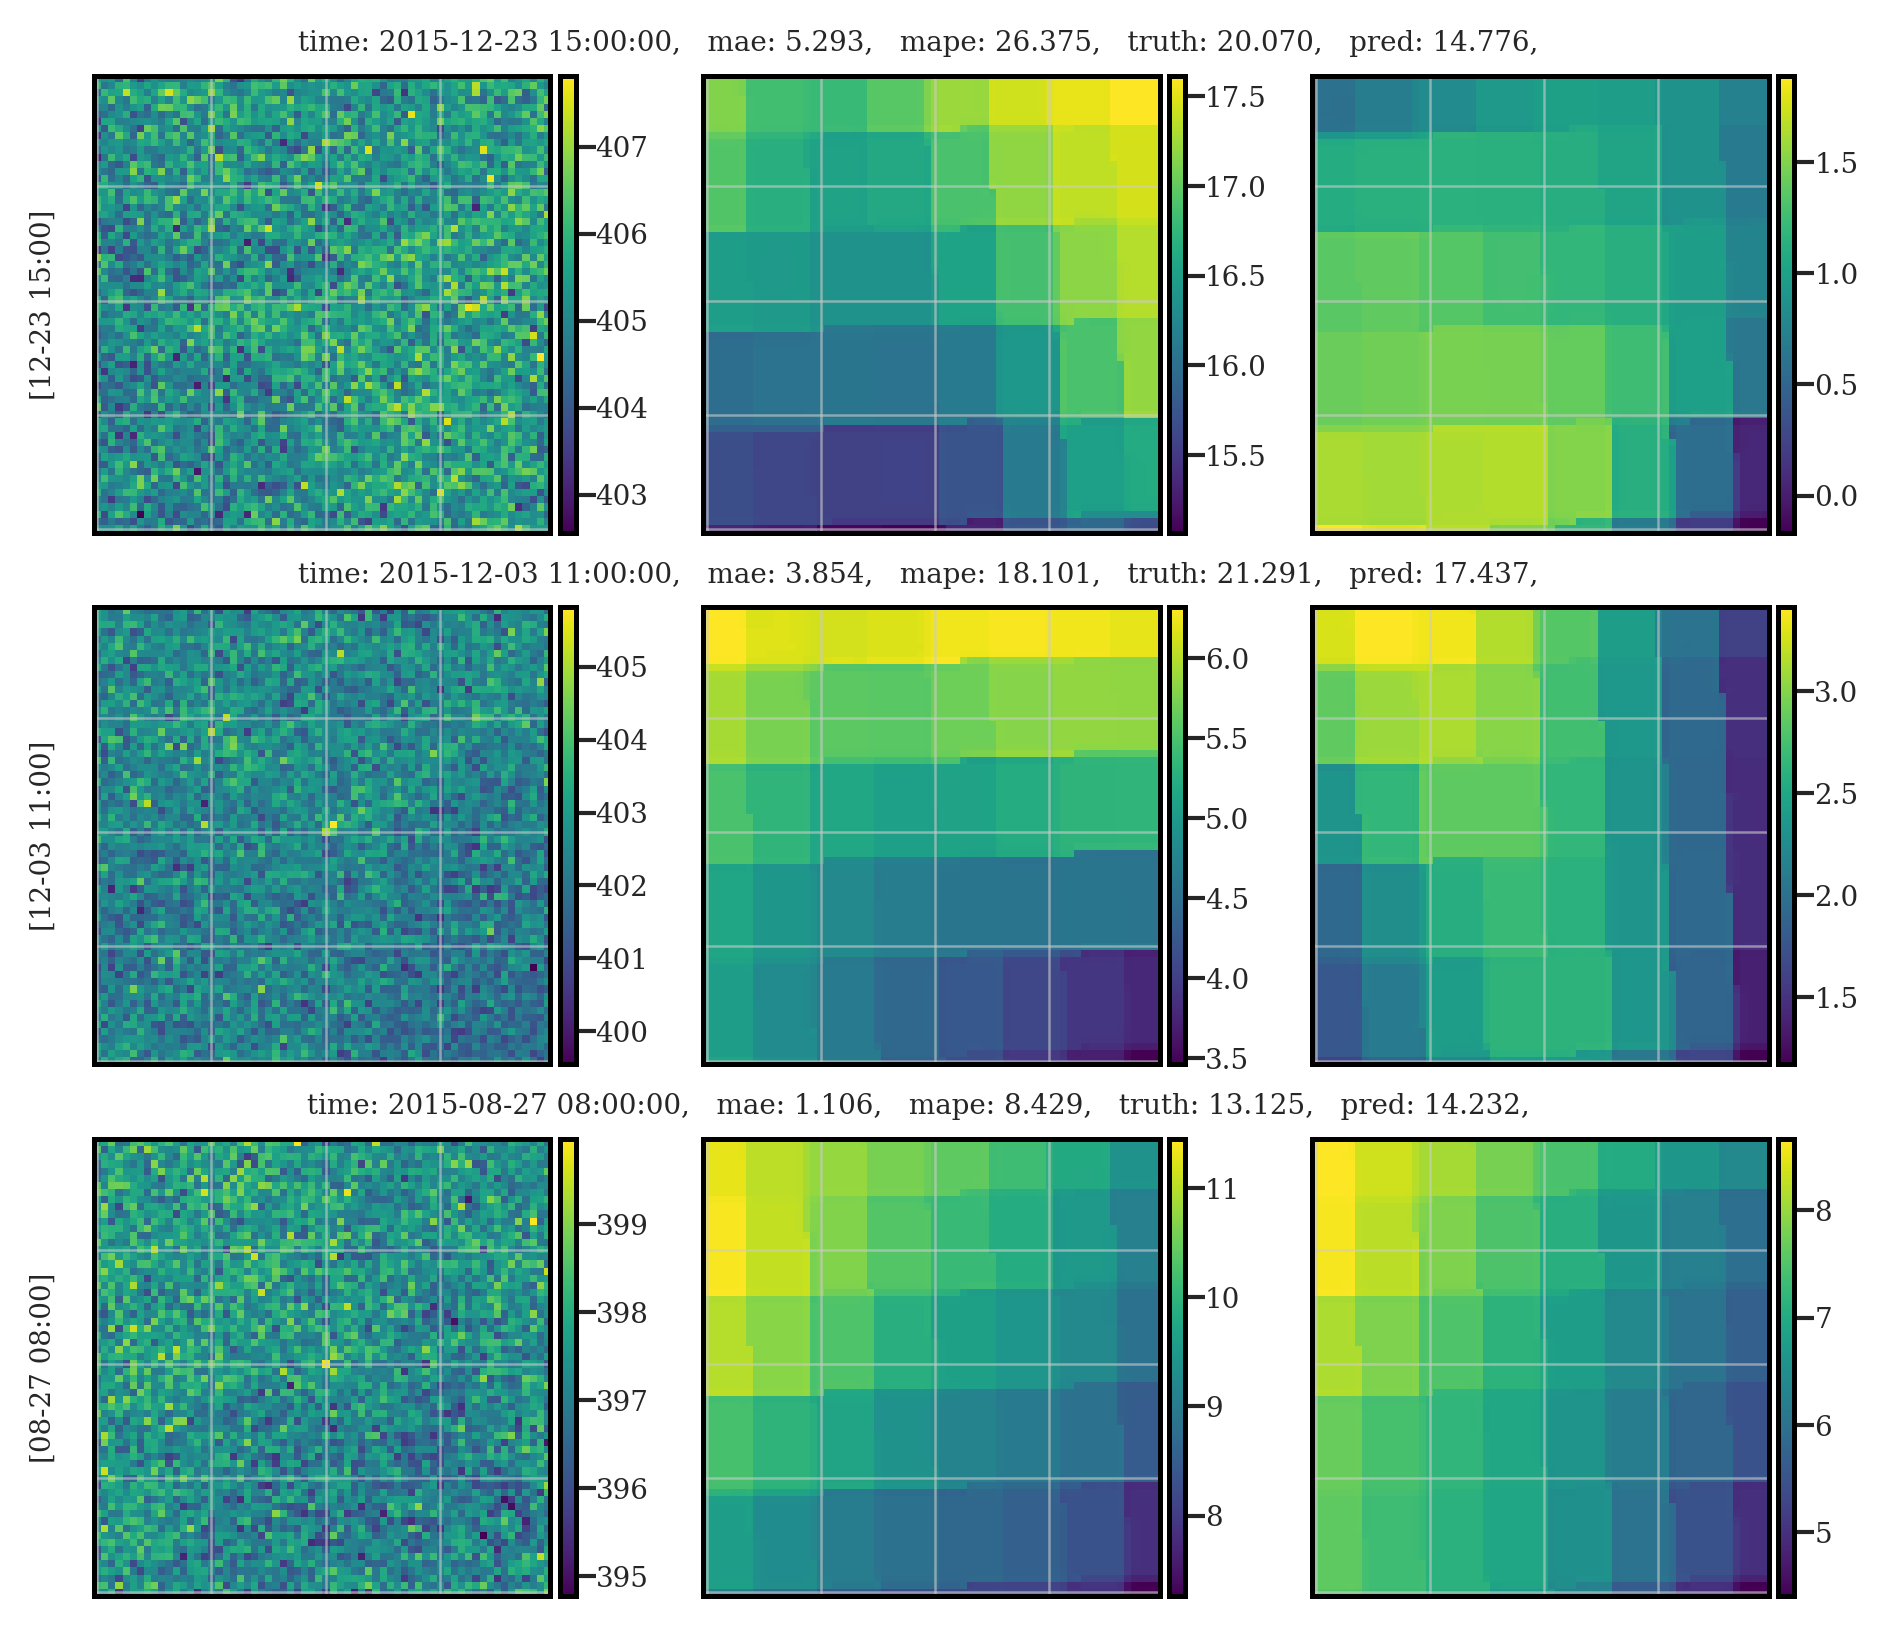

In [19]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)

nwbce: 2.5828514099121094
idx: 4787
origin: smart_2km_Lip_64
time: 2015-09-29T11:00:00.000000000
emiss: [18.57218 18.72539 16.57713]

nwbce: 2.7903671264648438
idx: 5727
origin: smart_2km_Lip_64
time: 2015-11-23T15:00:00.000000000
emiss: [18.91706 19.25123 20.25529]

nwbce: 2.6440963745117188
idx: 952
origin: smart_2km_Lip_64
time: 2015-02-25T16:00:00.000000000
emiss: [21.45722 22.23677 22.82182]

1/1 [==============================] - 0s 18ms/step


<Figure size 1920x1440 with 0 Axes>

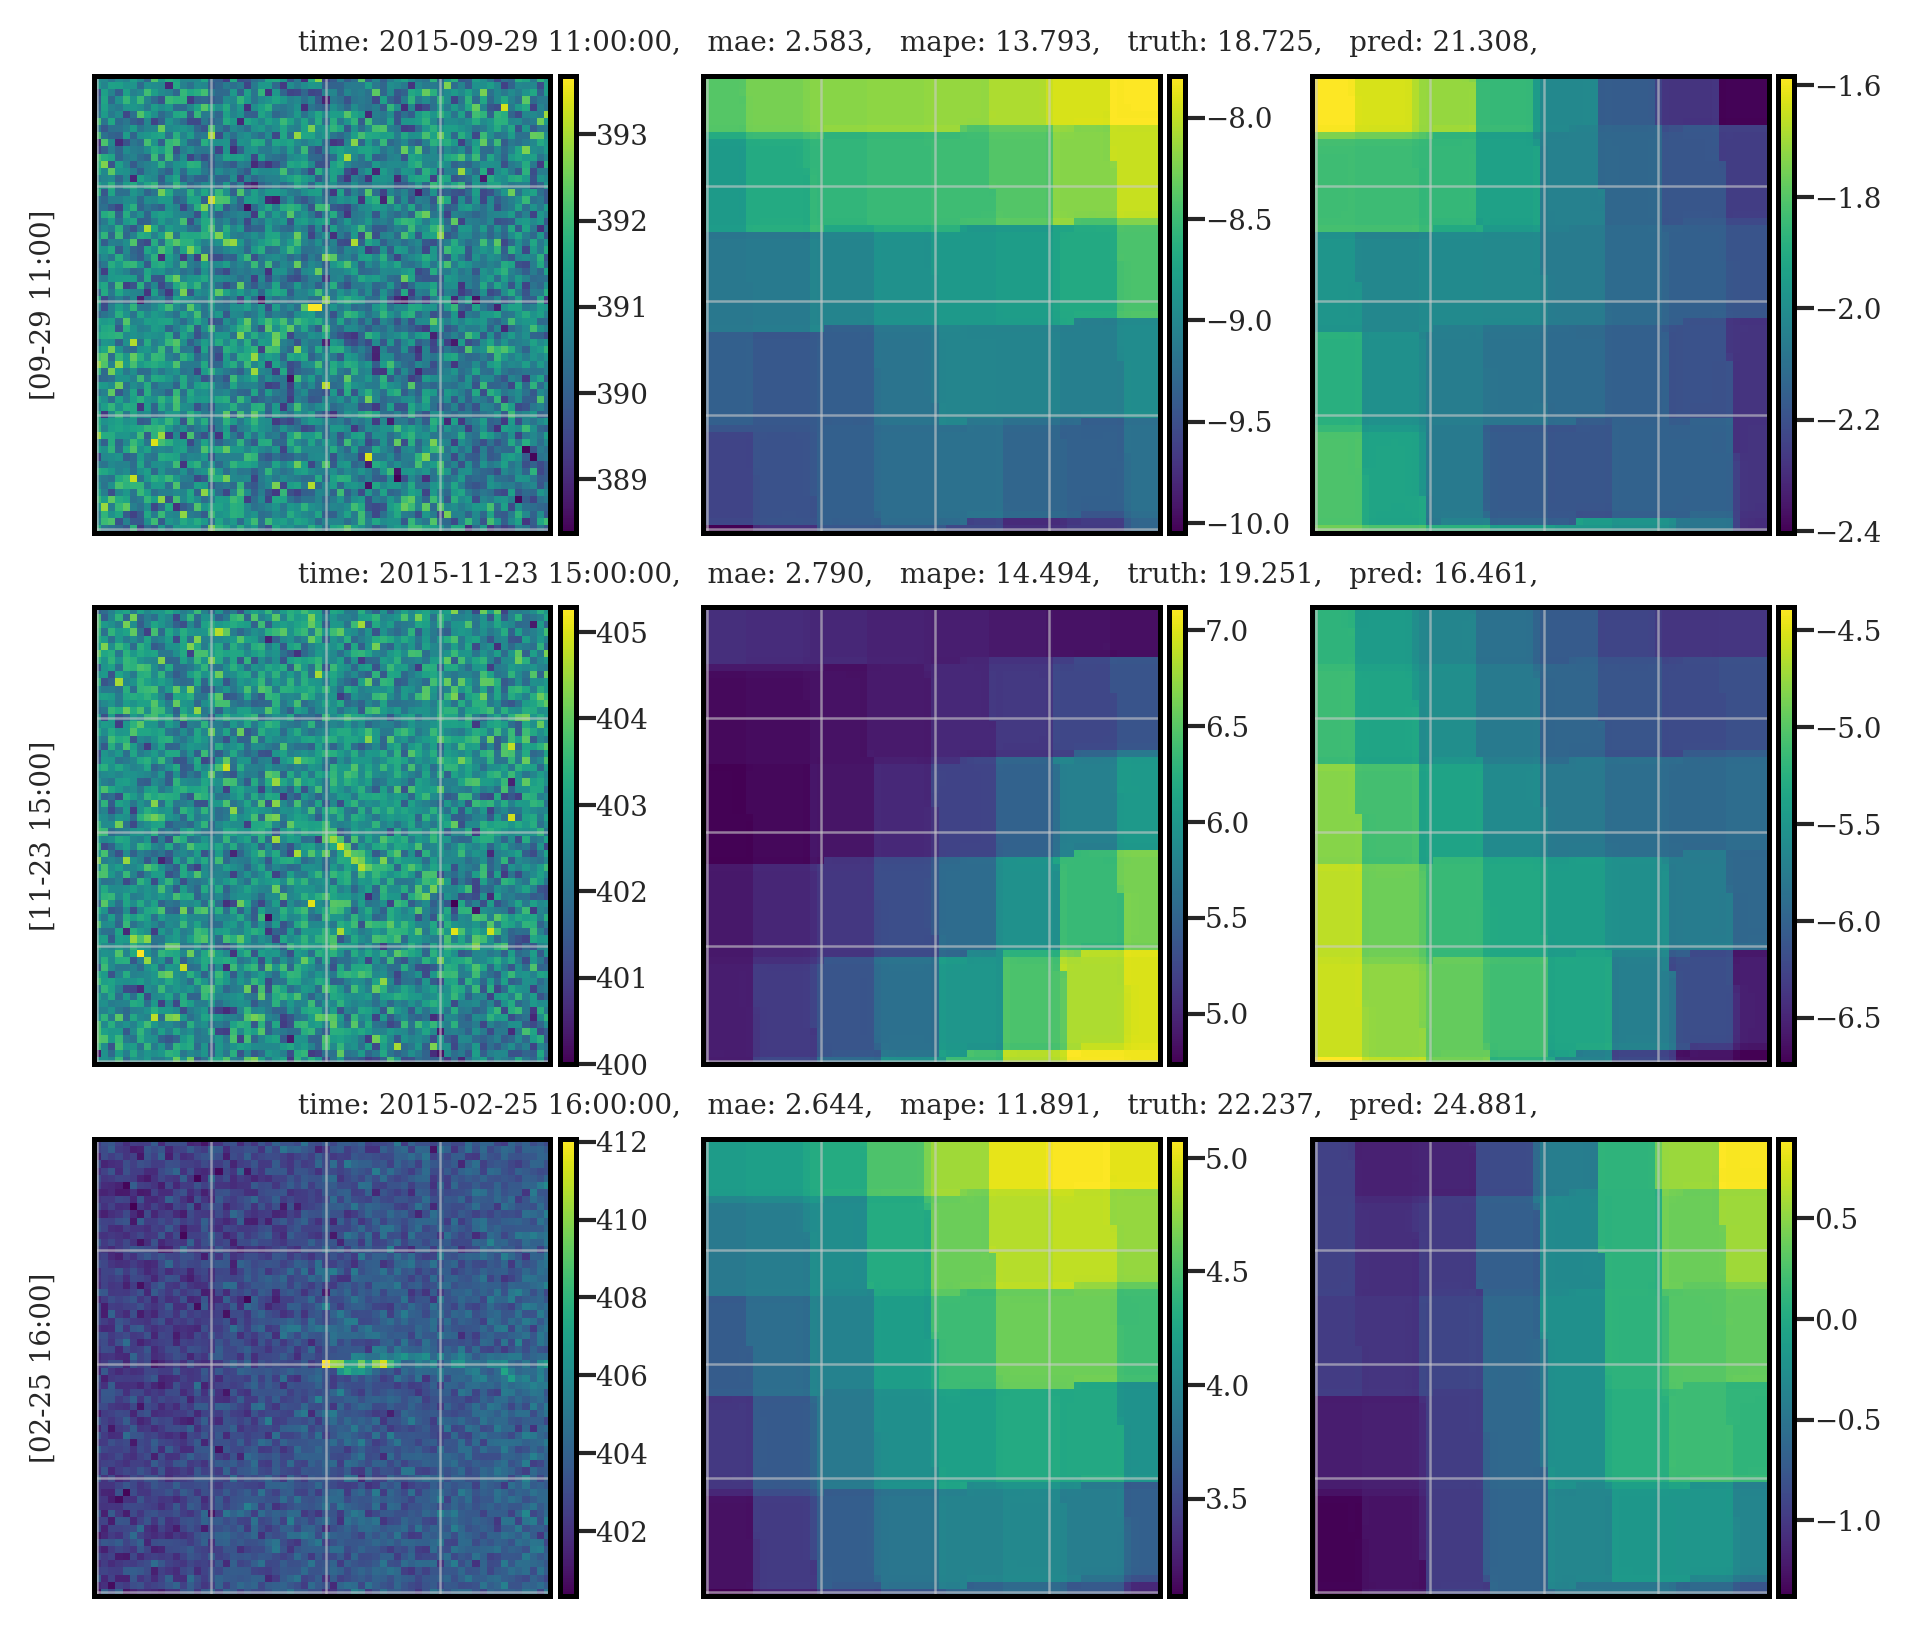

In [14]:
model_eval.plot_inversion_examples(data, metrics["mae"], metrics["mape"], model)